# Analisis Clustering & Anomaly Detection dengan PyCaret

Notebook ini berisi langkah-langkah analisis data **Iris** yang tersimpan dalam database PostgreSQL.  
Kita akan menggunakan **PyCaret** untuk melakukan **clustering (pengelompokan)** dan **anomaly detection (deteksi pencilan)**, lalu menyimpan hasil analisis ke dalam tabel baru di PostgreSQL.  
Hasil akhir akan divisualisasikan di **Power BI**.  

## Alur Analisis
1. **Impor library & muat data dari PostgreSQL** → Membaca tabel `data_iris` ke dalam DataFrame Pandas.  
2. **Clustering dengan PyCaret** → Mengelompokkan data menggunakan algoritma *K-Means*.  
3. **Deteksi anomali dengan PyCaret** → Menemukan data pencilan menggunakan algoritma *KNN*.  
4. **Gabungkan & simpan hasil ke PostgreSQL** → Membuat tabel baru `data_iris_analyzed_pycaret`.  
5. **Visualisasi di Power BI** → Menampilkan hasil clustering & anomaly detection.  

---

👉 Jalankan setiap cell **secara berurutan** agar analisis berjalan lancar.  


## Penjelasan Code

### 1. Import Library
- **pandas**: digunakan untuk manipulasi dan analisis data.
- **sqlalchemy**: digunakan untuk membuat koneksi ke database SQL.
- **pycaret.clustering & pycaret.anomaly**: modul dari PyCaret untuk melakukan analisis clustering dan deteksi anomali.

### 2. Konfigurasi Koneksi Database
```python
db_user = 'user'
db_password = 'password'
db_host = 'localhost'
db_port = '5432'
db_name = 'iris_data'
table_name = 'iris_data'


In [1]:
!pip install pycaret


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from sqlalchemy import create_engine

# Mengimpor modul dengan alias untuk menghindari konflik
import pycaret.clustering as pyc
import pycaret.anomaly as pya

# --- Konfigurasi dan Muat Data (Tetap Sama) ---
db_user = 'postgres'
db_password = '123456789'  # Ganti dengan password Anda
db_host = 'localhost'
db_port = '5432'
db_name = 'iris_data'
table_name = 'iris_data'

try:
    db_uri = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
    engine = create_engine(db_uri)
    df = pd.read_sql_table(table_name, engine)
    print(f"Dataset berhasil dimuat dari tabel '{table_name}'.")
    display(df.head())
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Dataset berhasil dimuat dari tabel 'iris_data'.


,id,sepal length,sepal width,petal length,petal width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## Analisis Clustering dengan PyCaret

Pada tahap ini, kita melakukan **clustering (pengelompokan data)** menggunakan algoritma **K-Means** dengan bantuan PyCaret.

1. **Setup lingkungan PyCaret**  
   ```python
   s_cluster = setup(data=df,
                     ignore_features=['id', 'Class'],
                     normalize=True,
                     session_id=123,
                     verbose=False)


In [19]:
# Setup lingkungan clustering menggunakan alias pyc
s_cluster = pyc.setup(data=df,
                      ignore_features=['id', 'Class'],
                      normalize=True,
                      session_id=123,
                      verbose=False)

# Buat model kmeans menggunakan alias pyc
kmeans_model = pyc.create_model('kmeans', num_clusters=3)
df_clustered = pyc.assign_model(kmeans_model)

print("Analisis Clustering Selesai.")
display(df_clustered.head())

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4554,236.8217,0.8296,0,0,0


Analisis Clustering Selesai.


,sepal length,sepal width,petal length,petal width,Cluster
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1


## visualisasi hasil clustering

Menampilkan Plot Hasil Clustering...


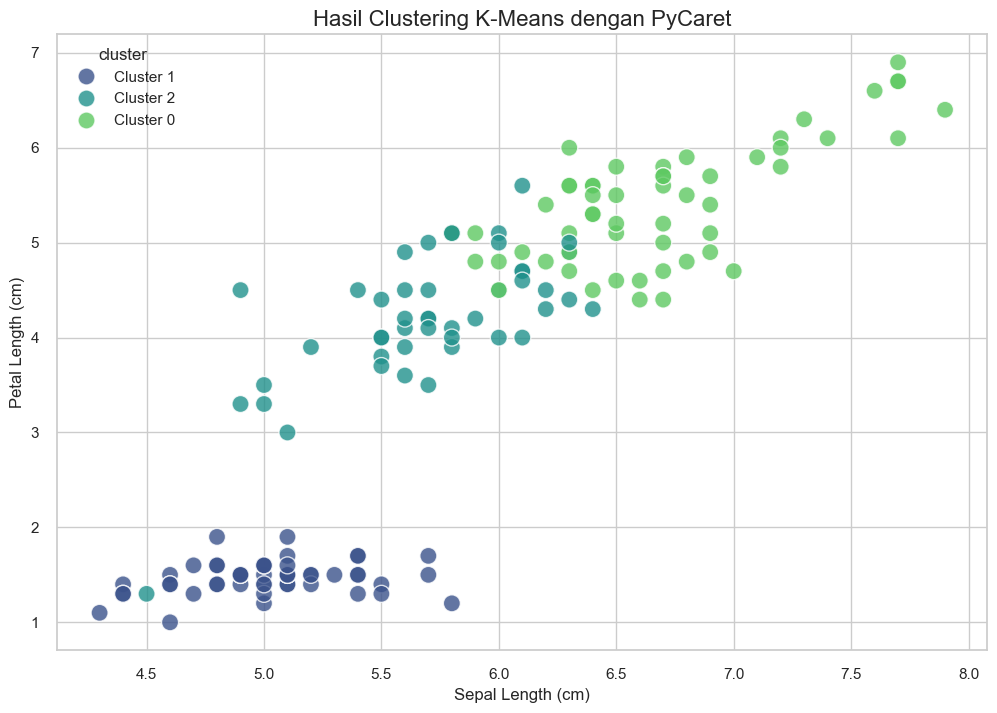

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi agar lebih menarik
sns.set(style="whitegrid")

# --- Visualisasi Hasil Clustering K-Means ---
print("Menampilkan Plot Hasil Clustering...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_final,
    x='sepal length',
    y='petal length',
    hue='cluster',      # Warnai titik berdasarkan kolom 'cluster'
    palette='viridis',  # Skema warna yang bagus untuk kategori
    s=150,              # Ukuran titik
    alpha=0.8,
    legend='full'
)
plt.title('Hasil Clustering K-Means dengan PyCaret', fontsize=16)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## Analisis Deteksi Anomali (Outlier) dengan PyCaret

Tahap ini digunakan untuk mendeteksi **anomali (outlier)** dalam dataset menggunakan algoritma **K-Nearest Neighbors (KNN)** dengan PyCaret.

1. **Setup lingkungan PyCaret untuk anomaly detection**  
   ```python
   s_anomaly = pya.setup(data=df,
                         ignore_features=['id', 'Class'],
                         normalize=True,
                         session_id=456,
                         verbose=False)


In [20]:
# Setup lingkungan anomali menggunakan alias pya
s_anomaly = pya.setup(data=df,
                      ignore_features=['id', 'Class'],
                      normalize=True,
                      session_id=456,
                      verbose=False)

# Buat model knn menggunakan alias pya
knn_anomaly_model = pya.create_model('knn')
df_anomalies = pya.assign_model(knn_anomaly_model)

print("Analisis Deteksi Anomali Selesai.")
display(df_anomalies.head())

Analisis Deteksi Anomali Selesai.


,sepal length,sepal width,petal length,petal width,Anomaly,Anomaly_Score
0,5.1,3.5,1.4,0.2,0,0.261206
1,4.9,3.0,1.4,0.2,0,0.272151
2,4.7,3.2,1.3,0.2,0,0.363503
3,4.6,3.1,1.5,0.2,0,0.353848
4,5.0,3.6,1.4,0.2,0,0.374971


## visualisasi hasil deteksi outlier

Menampilkan Plot Hasil Deteksi Outlier...


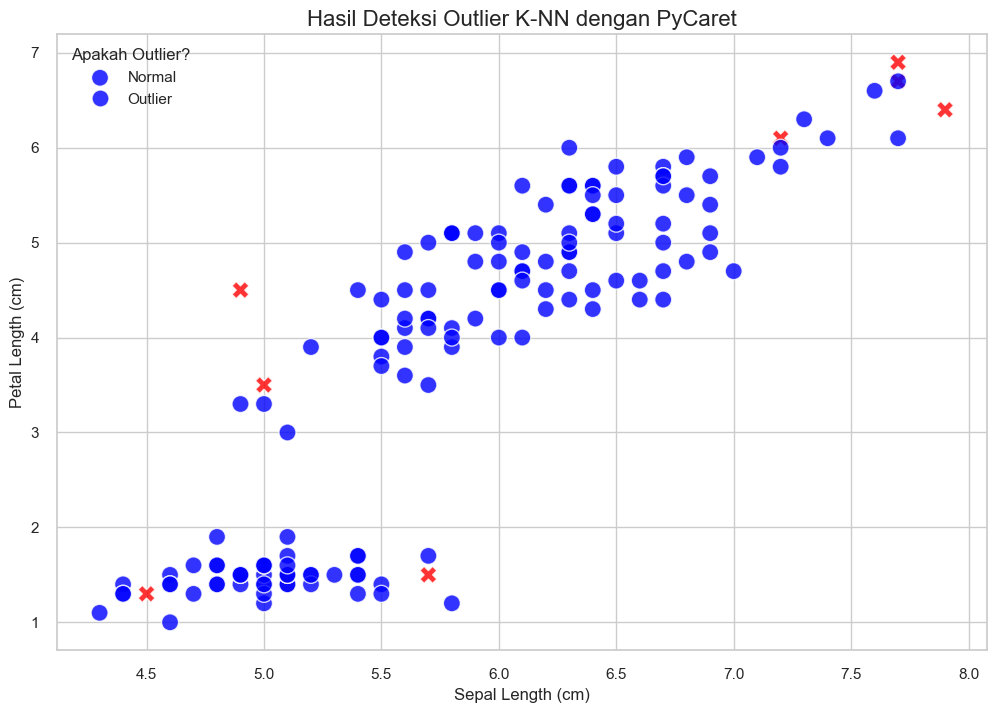

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi agar lebih menarik
sns.set(style="whitegrid")

# --- Visualisasi Hasil Deteksi Outlier K-NN ---
print("Menampilkan Plot Hasil Deteksi Outlier...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_final,
    x='sepal length',
    y='petal length',
    hue='is_outlier',   # Warnai titik berdasarkan status outlier (0 atau 1)
    style='is_outlier', # Beri bentuk berbeda untuk outlier
    palette={0: 'blue', 1: 'red'}, # 0=Normal (biru), 1=Outlier (merah)
    s=150,
    alpha=0.8
)
plt.title('Hasil Deteksi Outlier K-NN dengan PyCaret', fontsize=16)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Apakah Outlier?', labels=['Normal', 'Outlier'])
plt.show()

## Gabungkan Hasil Analisis & Simpan ke PostgreSQL

Tahap terakhir di Python adalah menggabungkan hasil **clustering** dan **anomali** ke dalam satu DataFrame, lalu menyimpannya sebagai tabel baru di database PostgreSQL.

1. **Membuat DataFrame final**  
   ```python
   df_final = df.copy()
   df_final['cluster'] = df_clustered['Cluster']
   df_final['is_outlier'] = df_anomalies['Anomaly']


In [22]:
# Buat DataFrame final
df_final = df.copy()
df_final['cluster'] = df_clustered['Cluster']
df_final['is_outlier'] = df_anomalies['Anomaly']

print("DataFrame final telah dibuat:")
display(df_final.head())

# Simpan hasil akhir ke tabel baru
try:
    new_table_name = 'data_iris_analyzed_pycaret'
    df_final.to_sql(new_table_name, engine, if_exists='replace', index=False)
    print(f"\n✅ Hasil analisis berhasil disimpan ke tabel baru '{new_table_name}'.")
except Exception as e:
    print(f"\nTerjadi kesalahan saat menyimpan hasil: {e}")

DataFrame final telah dibuat:


,id,sepal length,sepal width,petal length,petal width,cluster,is_outlier
0,1,5.1,3.5,1.4,0.2,Cluster 1,0
1,2,4.9,3.0,1.4,0.2,Cluster 1,0
2,3,4.7,3.2,1.3,0.2,Cluster 1,0
3,4,4.6,3.1,1.5,0.2,Cluster 1,0
4,5,5.0,3.6,1.4,0.2,Cluster 1,0



✅ Hasil analisis berhasil disimpan ke tabel baru 'data_iris_analyzed_pycaret'.
